# Nanoparticle Simulation
The configuration files are here, which should be unmodified from the ParSplice [`exaalt`](https://gitlab.com/exaalt/parsplice/tree/exaalt) branch.
- [ps-config.xml](../conf/ps-config/nano.xml), [input.lammps](../conf/nano/input.lammps), [voter-pt.eam](../conf/nano/voter-pt.eam)

It was run on a 10 node 10Gbit ethernet connected cluster (CloudLab Profile is [here](https://www.cloudlab.us/show-profile.php?uuid=bda75a84-7227-11e7-91c5-90e2ba22fee4)), where each node has 36 cores and 64GB of RAM. I run the default configuration 3 times. 

In [1]:
from helpers import *
%matplotlib inline
results = ["results-nano.xml-run0","results-nano.xml-run1","results-nano.xml-run1"]

## Overall Health: (`times.out` and LevelDB performance counters)

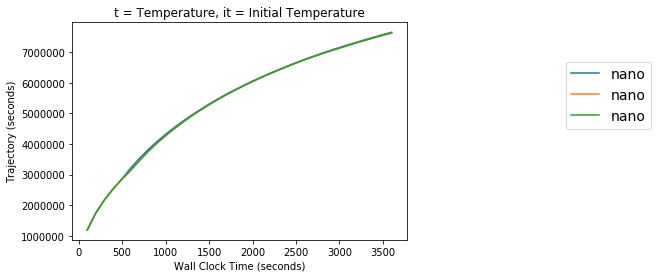

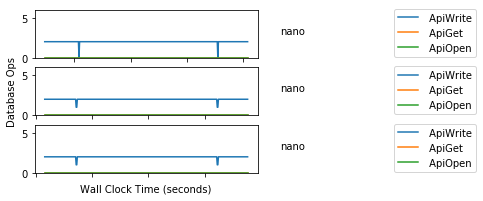

In [2]:
plot_times(results)
plot_dbactivity(results, dbnode='node-1')

This looks a lot different than the [UO2 experiments](../../baseline/visualize/Notes.ipynb). There are a lot more trajectory calculations and the performance seems to stall, as the curve is not linear. Performance is also a lot smoother and reproducible. The persistent database activity is neglible, similar to the U02 experiemnts. The big difference is that there is a constant stream of 2 writes. All three runs are, again, predictable (dips at EXACTLY the same time). Perhaps the in-memory database node is absorbing all the database requests.

## ParSplice Performance Counters

The results were prepared with:
```bash
./prepare.sh results-nano.xml-run0
mv tmp tmp-results-nano.xml-run0
```

results-nano.xml-run0 results-nano.xml-run1 results-nano.xml-run1


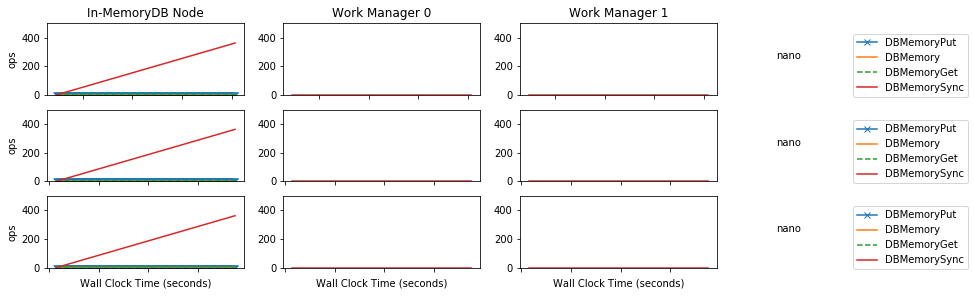

In [3]:
plot_psactivity_sweep(results, ylim=500)

This is concerning. There is almost NO activity happening:
- work managers are not servicing requests
- in-memory database is doing LESS operations per second than the UO2 example

## Resource utilization

We plot the utilization from the UO2 example. We just copy those results into this directory and prepare them:

```bash
cp -r ../../baseline/results-t2000it400.xml-dbfix/ ../results-UO2
./prepare.sh results-UO2; mv tmp tmp-results-UO2
```

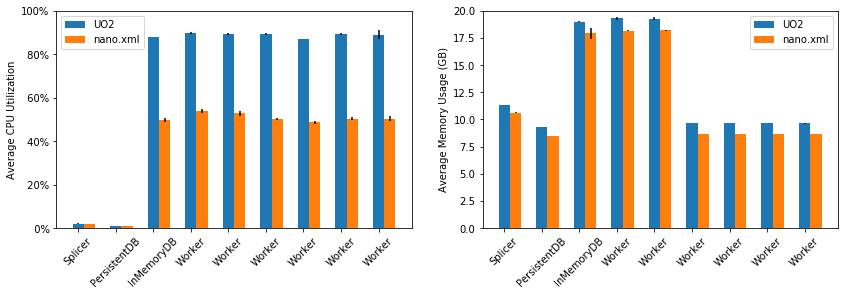

In [4]:
plot_bar_cpu("tmp-results-nano.xml-run0", "tmp-results-UO2")

The conclusion is that U02 workers seem to be doing more work. 

## More ParSplice Counters

results-nano.xml-run0 results-nano.xml-run1 results-nano.xml-run1


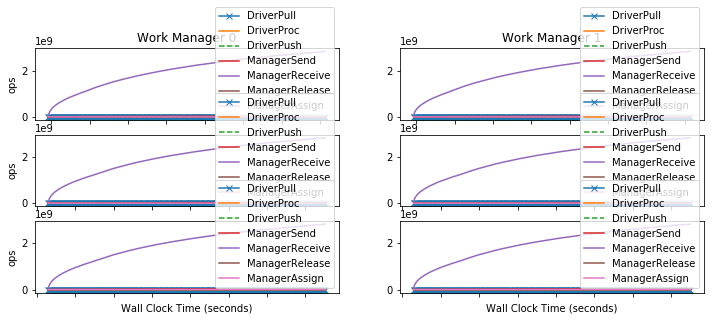

In [5]:
plot_other_psactivity(results)

Again, this tell us nothing. Some questions I have:
- Is this setup healthy? The `times.out` curve is not linear and starts to decay, which indicates that ParSpliceis overloading the system somewhere.
- Do a higher trajectory durations **necessarily** mean that more work is getting down? The `times.out` graph looks like work is getting done (values are MUCH larger than the U02 example) but the performance counters indicate that nothing is getting done.
- Which configuration parameters can I change to see more action on the DBs? I see *slightly* more requests to the persistent DB but almost **NO** activity to the in-memory DB and worker DBs.